In [1]:
import numpy as np 
import os
import pickle
import random
from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [2]:
train_dataset = 'train'
test_dataset = 'val'

# Data Pre-Processing

In [3]:
for category in os.listdir(train_dataset):
    category_data = os.path.join(train_dataset, category)
    image_count = len(os.listdir(category_data))
    print(f'Number of images classified as {category}: ', image_count)

Number of images classified as benign:  4074
Number of images classified as malignant:  4042


In [4]:
for category in os.listdir(test_dataset):
    category_data = os.path.join(test_dataset, category)
    image_count = len(os.listdir(category_data))
    print(f'Number of images classified as {category}: ', image_count)

Number of images classified as benign:  500
Number of images classified as malignant:  400


In [5]:
mapping = {
    'benign': 0,
    'malignant': 1
}

In [6]:
IMAGE_SIZE = (224,224,3)

In [7]:
train_images = []
train_labels = []
for category in os.listdir(train_dataset):
    category_data = os.path.join(train_dataset, category)
    image_titles = os.listdir(category_data)
    image_samples = random.sample(image_titles, 2000)
    for image_title in image_samples:
        image_path = os.path.join(category_data, image_title)
        image = imread(image_path)
        image = resize(image, IMAGE_SIZE)
        train_images.append(image)
        train_labels.append(mapping[category])

In [11]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [20]:
 model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [22]:
classification = model.fit(X_train,y_train, epochs=20, validation_split=0.1)

Epoch 1/20
113/113 [==============================] - 16s 75ms/step - loss: 0.6450 - accuracy: 0.6592 - val_loss: 0.5880 - val_accuracy: 0.6875
Epoch 2/20
113/113 [==============================] - 7s 63ms/step - loss: 0.5545 - accuracy: 0.7267 - val_loss: 0.5346 - val_accuracy: 0.6500
Epoch 3/20
113/113 [==============================] - 7s 63ms/step - loss: 0.4727 - accuracy: 0.7622 - val_loss: 0.4251 - val_accuracy: 0.7425
Epoch 4/20
113/113 [==============================] - 7s 63ms/step - loss: 0.3923 - accuracy: 0.7983 - val_loss: 0.5298 - val_accuracy: 0.7050
Epoch 5/20
113/113 [==============================] - 7s 63ms/step - loss: 0.3416 - accuracy: 0.8303 - val_loss: 0.5241 - val_accuracy: 0.6650
Epoch 6/20
113/113 [==============================] - 7s 63ms/step - loss: 0.2845 - accuracy: 0.8550 - val_loss: 0.3139 - val_accuracy: 0.8125
Epoch 7/20
113/113 [==============================] - 7s 63ms/step - loss: 0.2641 - accuracy: 0.8644 - val_loss: 0.2744 - val_accuracy: 0.865

In [23]:
import matplotlib.pyplot as plt

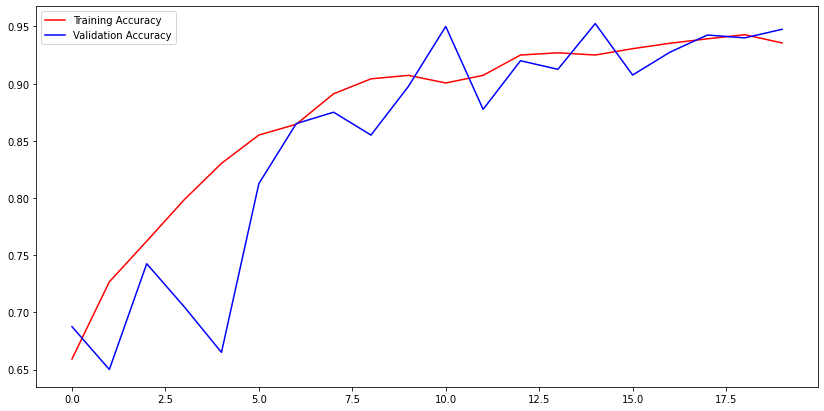

In [24]:
Accuracy = classification.history['accuracy']
validation_accuracy = classification.history['val_accuracy']
epochs = range(len(Accuracy))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,Accuracy,'r',label="Training Accuracy")
plt.plot(epochs,validation_accuracy,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

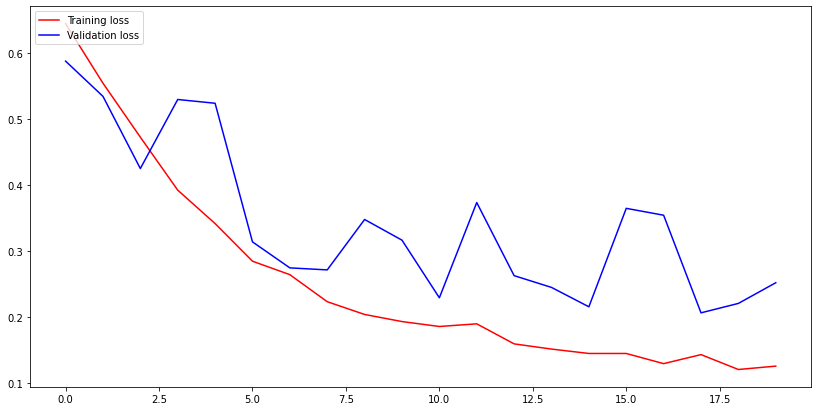

In [25]:
loss = classification.history['loss']
validation_loss = classification.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,validation_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()